<a href="https://colab.research.google.com/github/schusmeicer/kagle_urban_noise/blob/main/Kaggle_urban_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libs

In [ ]:
!pip install reverse_geocoder

In [ ]:
import pandas as pd
import reverse_geocoder as rg
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read dataset

In [ ]:
file_path = "urban_noise_levels.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "khushikyad001/urban-noise-levels",
  file_path,
)

/tmp/ipykernel_55/1619172201.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2000 non-null   int64  
 1   latitude            2000 non-null   float64
 2   longitude           2000 non-null   float64
 3   datetime            2000 non-null   object 
 4   decibel_level       2000 non-null   float64
 5   hour                2000 non-null   int64  
 6   day_of_week         2000 non-null   int64  
 7   is_weekend          2000 non-null   int64  
 8   temperature_c       2000 non-null   float64
 9   humidity_%          2000 non-null   float64
 10  wind_speed_kmh      2000 non-null   float64
 11  precipitation_mm    2000 non-null   float64
 12  traffic_density     2000 non-null   int64  
 13  near_airport        2000 non-null   int64  
 14  near_highway        2000 non-null   int64  
 15  near_construction   2000 non-null   int64  
 16  popula

In [ ]:
df.describe()

,id,latitude,longitude,decibel_level,hour,day_of_week,is_weekend,temperature_c,humidity_%,wind_speed_kmh,precipitation_mm,traffic_density,near_airport,near_highway,near_construction,population_density,park_proximity,industrial_zone,vehicle_count,honking_events,public_event,holiday,school_zone,noise_complaints,sensor_id
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,40.699455,-73.951805,64.815110,11.606500,3.060000,0.295500,17.696283,55.179931,20.104265,1.995582,2.928000,0.100500,0.307500,0.219000,15559.801500,0.497500,0.144000,20.109000,2.98500,0.056500,0.106000,0.144000,0.986000,25.541500
std,577.494589,0.116884,0.144290,10.069717,6.994149,1.966554,0.456381,7.165606,19.992284,11.679273,2.025925,1.409542,0.300741,0.461574,0.413672,8369.974373,0.500119,0.351178,4.499694,1.71004,0.230942,0.307915,0.351178,0.984016,14.410555
min,1.000000,40.501287,-74.199994,33.232962,0.000000,0.000000,0.000000,-4.547114,20.003698,0.006310,0.002641,1.000000,0.000000,0.000000,0.000000,1018.000000,0.000000,0.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,40.595219,-74.074607,57.907870,6.000000,1.000000,0.000000,12.775756,37.986261,10.025685,0.541206,2.000000,0.000000,0.000000,0.000000,8490.500000,0.000000,0.000000,17.000000,2.00000,0.000000,0.000000,0.000000,0.000000,14.000000
50%,1000.500000,40.702941,-73.953653,65.019535,12.000000,3.000000,0.000000,17.635835,55.204723,19.819367,1.337807,3.000000,0.000000,0.000000,0.000000,15668.500000,0.000000,0.000000,20.000000,3.00000,0.000000,0.000000,0.000000,1.000000,26.000000
75%,1500.250000,40.800272,-73.825655,71.647588,18.000000,5.000000,1.000000,22.756373,72.396867,30.468300,2.844419,4.000000,0.000000,1.000000,0.000000,22798.000000,1.000000,0.000000,23.000000,4.00000,0.000000,0.000000,0.000000,2.000000,38.000000
max,2000.000000,40.899887,-73.700221,97.430930,23.000000,6.000000,1.000000,40.000000,89.977124,39.973405,17.086501,5.000000,1.000000,1.000000,1.000000,29991.000000,1.000000,1.000000,39.000000,10.00000,1.000000,1.000000,1.000000,5.000000,50.000000


In [ ]:
missing_values = df.isnull().sum()

display(missing_values)

id                    0
latitude              0
longitude             0
datetime              0
decibel_level         0
hour                  0
day_of_week           0
is_weekend            0
temperature_c         0
humidity_%            0
wind_speed_kmh        0
precipitation_mm      0
traffic_density       0
near_airport          0
near_highway          0
near_construction     0
population_density    0
park_proximity        0
industrial_zone       0
vehicle_count         0
honking_events        0
public_event          0
holiday               0
school_zone           0
noise_complaints      0
sensor_id             0
dtype: int64

In [ ]:
df.head()

,id,latitude,longitude,datetime,decibel_level,hour,day_of_week,is_weekend,temperature_c,humidity_%,wind_speed_kmh,precipitation_mm,traffic_density,near_airport,near_highway,near_construction,population_density,park_proximity,industrial_zone,vehicle_count,honking_events,public_event,holiday,school_zone,noise_complaints,sensor_id
0,1,40.649816,-74.069147,2023-04-01 18:50:00,78.286408,18,5,1,16.710979,43.054747,28.737659,0.515447,4,0,0,0,28384,0,0,24,1,0,0,1,1,31
1,2,40.880286,-74.076511,2023-03-18 04:12:00,68.131845,4,5,1,10.088749,29.676246,15.681181,0.008220,2,0,0,0,24206,0,0,15,2,0,0,0,0,40
2,3,40.792798,-73.746873,2023-12-03 05:43:00,58.934966,5,6,1,19.911075,47.932832,36.197181,0.839945,4,0,1,0,1894,1,0,15,2,0,0,0,0,41
3,4,40.739463,-74.075227,2023-06-20 00:44:00,69.559042,0,1,0,3.477520,88.594010,22.400160,6.938482,4,0,0,0,2265,1,0,24,4,0,0,1,2,50
4,5,40.562407,-74.064025,2023-12-28 12:06:00,60.409097,12,3,0,17.356303,35.811699,18.015603,2.374674,3,0,0,1,23807,1,0,25,2,0,0,0,0,8


Api with data location, like city and state.
Im using this to have more variables to agg

In [ ]:
def dados_api(latitude,longitude,regiao='admin1'):
  coordinates = list(zip(latitude, longitude))
  dados = rg.search(coordinates) #usado o metodo 2 (metodo 2 é o padrão da lib) indicado pela documentação, executando a consulta em lote
  dados_final = [i[regiao] for i in dados if i[regiao] != None]
  return dados_final
# a regiao é definida pela lib,
# podemos usar essas opções é basicamente o retorno da lib sobre a lat e long
# {'name': 'Cochin',
# 'cc': 'IN',
# 'lat': '9.93988',
# 'lon': '76.26022',
# 'admin1': 'Kerala',
# 'admin2': 'Ernakulam'},

df['estado'] = dados_api(df['latitude'],df['longitude'])
df['cidade'] = dados_api(df['latitude'],df['longitude'],'name')
# 5. Agrupe por cidade
print("\nContagem de registros por cidade:")
print(df['cidade'].value_counts())
print(df['estado'].value_counts())

Loading formatted geocoded file...

Contagem de registros por cidade:
cidade
Coney Island             162
Atlantic Beach           128
Staten Island            119
East New York            116
Inwood                    95
The Bronx                 85
Bayonne                   81
Long Island City          69
Jamaica                   67
Bensonhurst               66
Brooklyn                  66
East Atlantic Beach       56
Borough of Queens         52
New York City             51
Jersey City               46
Bloomfield                44
Manhattan                 32
Sands Point               25
Newark                    24
Secaucus                  22
Hoboken                   22
Pelham Manor              21
Edgewater                 21
Kings Point               20
Bellerose Terrace         19
Elizabeth                 18
Clifton                   18
South Valley Stream       17
Kearny                    15
New Rochelle              14
Nutley                    13
Eastchester             

# Looking at a correlation matrix.

Variáveis numéricas:
['latitude', 'longitude', 'decibel_level', 'hour', 'day_of_week', 'is_weekend', 'temperature_c', 'humidity_%', 'wind_speed_kmh', 'precipitation_mm', 'traffic_density', 'near_airport', 'near_highway', 'near_construction', 'population_density', 'park_proximity', 'industrial_zone', 'vehicle_count', 'honking_events', 'public_event', 'holiday', 'school_zone', 'noise_complaints', 'sensor_id']


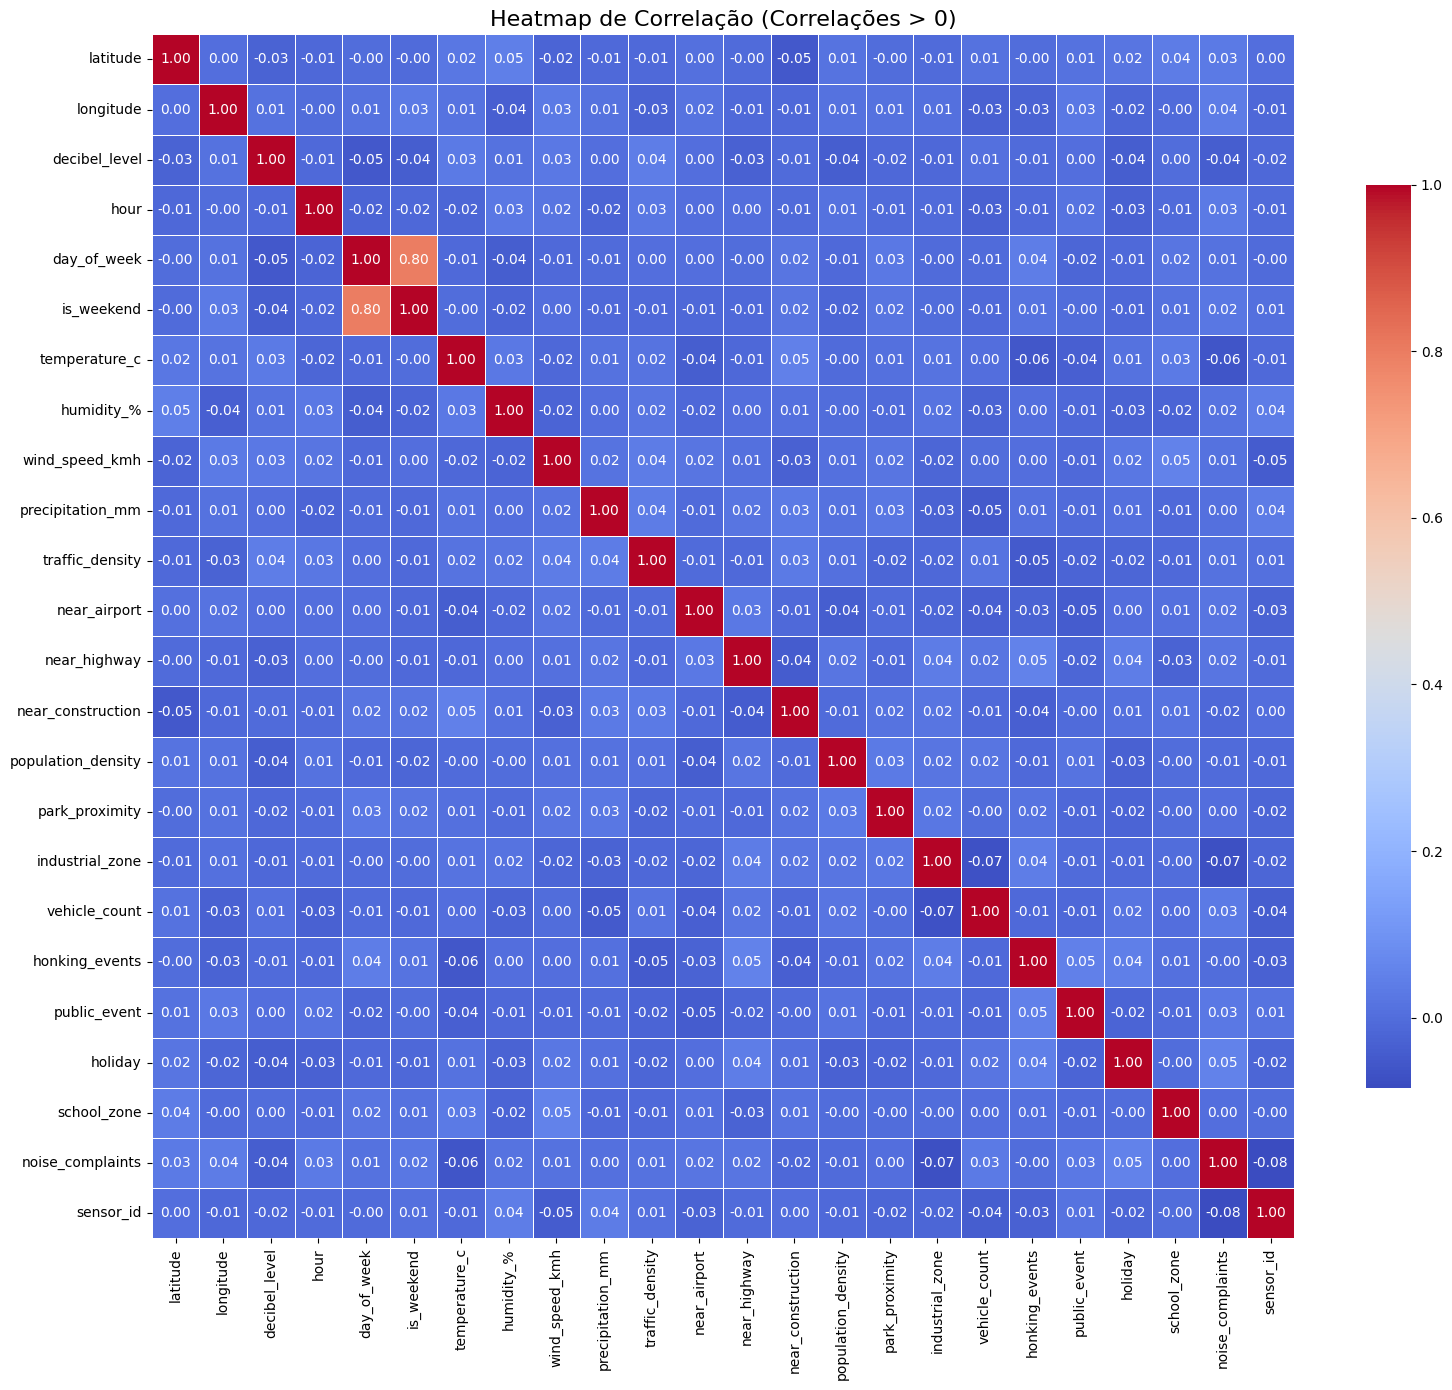

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Variáveis numéricas:")
numeric_cols.pop(0) #remove o id
print(numeric_cols)

matriz_correlacao = df[numeric_cols].corr()
# Definir um limiar de correlação (ex: 0.1 ou 0.2 para considerar "relevante")
threshold = 0

# Criar uma máscara: True para correlações abaixo do limiar (em valor absoluto), False para as relevantes
mask = np.abs(matriz_correlacao) < threshold
# Crie o heatmap
plt.figure(figsize=(16, 14)) # Aumente o tamanho para mais variáveis
sns.heatmap(
    matriz_correlacao,
    annot=True,       # Mostra os valores de correlação no gráfico
    cmap='coolwarm',  # Define o mapa de cores (quente/frio)
    fmt='.2f',        # Formata os números com 2 casas decimais
    linewidths=.5,     # Adiciona linhas de grade
    mask=mask,  # Aplica a máscara
    cbar_kws={"shrink": .75} # Ajusta o tamanho da barra de cores
)
plt.title(f'Heatmap de Correlação (Correlações > {threshold})', fontsize=16)
plt.xticks(rotation=90, ha='center', fontsize=10) # Rotação para rótulos na parte inferior
plt.yticks(rotation=0, va='center', fontsize=10) # Rotação para rótulos na lateral
plt.tight_layout()


plt.show()

t seems these variables are not useful in this case. day_of_week and is_weekend are causing issues.

In [ ]:
vars_drop = ['day_of_week','is_weekend','latitude','longitude','id','sensor_id']

Variáveis numéricas:
['decibel_level', 'hour', 'temperature_c', 'humidity_%', 'wind_speed_kmh', 'precipitation_mm', 'traffic_density', 'near_airport', 'near_highway', 'near_construction', 'population_density', 'park_proximity', 'industrial_zone', 'vehicle_count', 'honking_events', 'public_event', 'holiday', 'school_zone', 'noise_complaints']


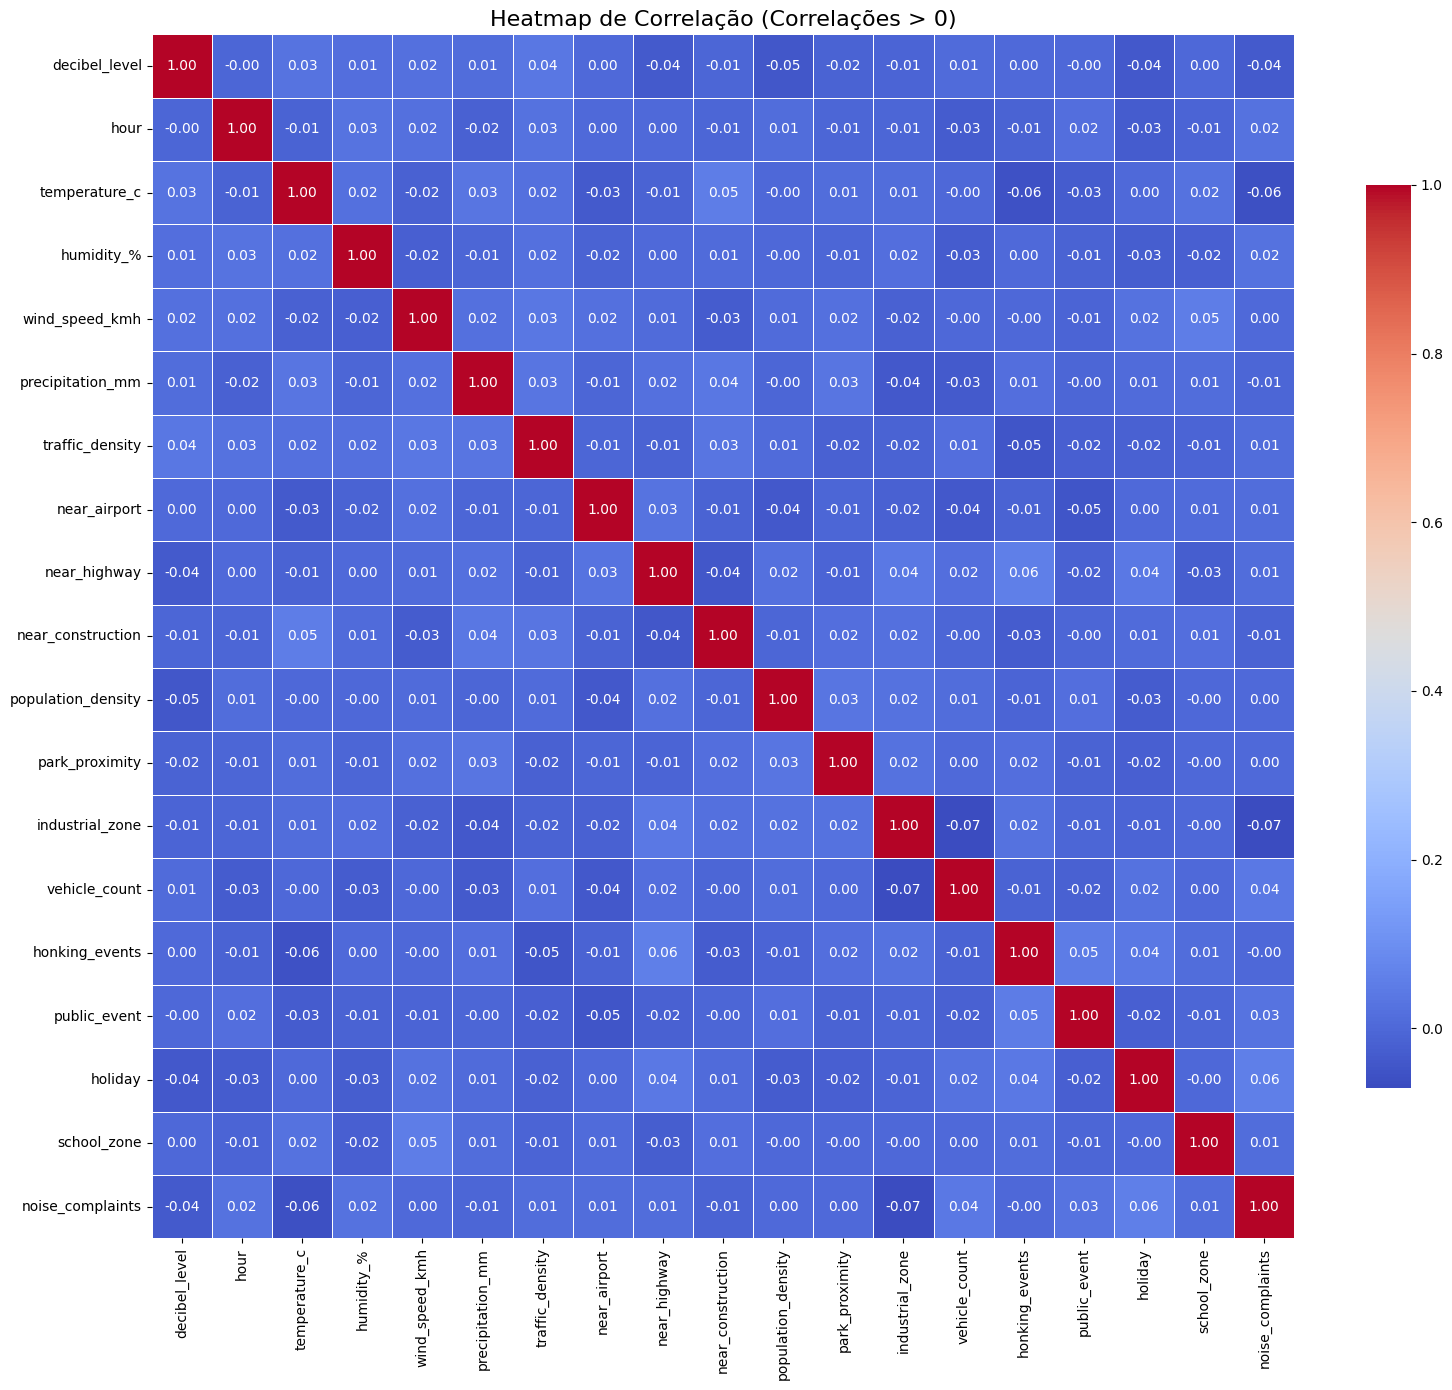

In [ ]:
numeric_cols = df.drop(vars_drop,axis=1).select_dtypes(include=['number']).columns.tolist()
print("Variáveis numéricas:")
print(numeric_cols)

matriz_correlacao = df[numeric_cols].corr(method='spearman')
# Definir um limiar de correlação (ex: 0.1 ou 0.2 para considerar "relevante")

# Crie o heatmap
plt.figure(figsize=(16, 14)) # Aumente o tamanho para mais variáveis
sns.heatmap(
    matriz_correlacao,
    annot=True,       # Mostra os valores de correlação no gráfico
    cmap='coolwarm',  # Define o mapa de cores (quente/frio)
    fmt='.2f',        # Formata os números com 2 casas decimais
    linewidths=.5,     # Adiciona linhas de grade
    cbar_kws={"shrink": .75} # Ajusta o tamanho da barra de cores
)
plt.title(f'Heatmap de Correlação (Correlações > {threshold})', fontsize=16)
plt.xticks(rotation=90, ha='center', fontsize=10) # Rotação para rótulos na parte inferior
plt.yticks(rotation=0, va='center', fontsize=10) # Rotação para rótulos na lateral
plt.tight_layout()


plt.show()

# Im now just exploring data

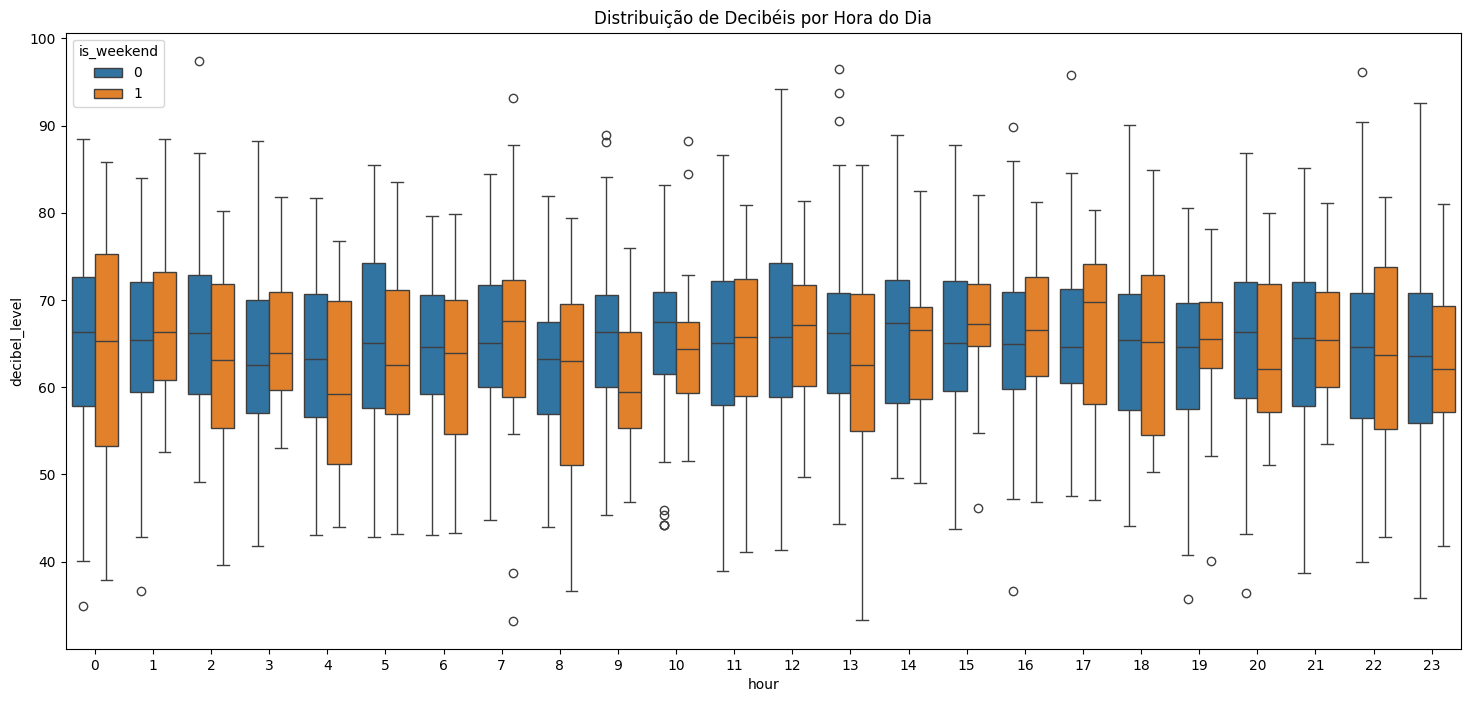

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='hour', y='decibel_level',hue='is_weekend')
plt.title('Distribuição de Decibéis por Hora do Dia')
plt.show()



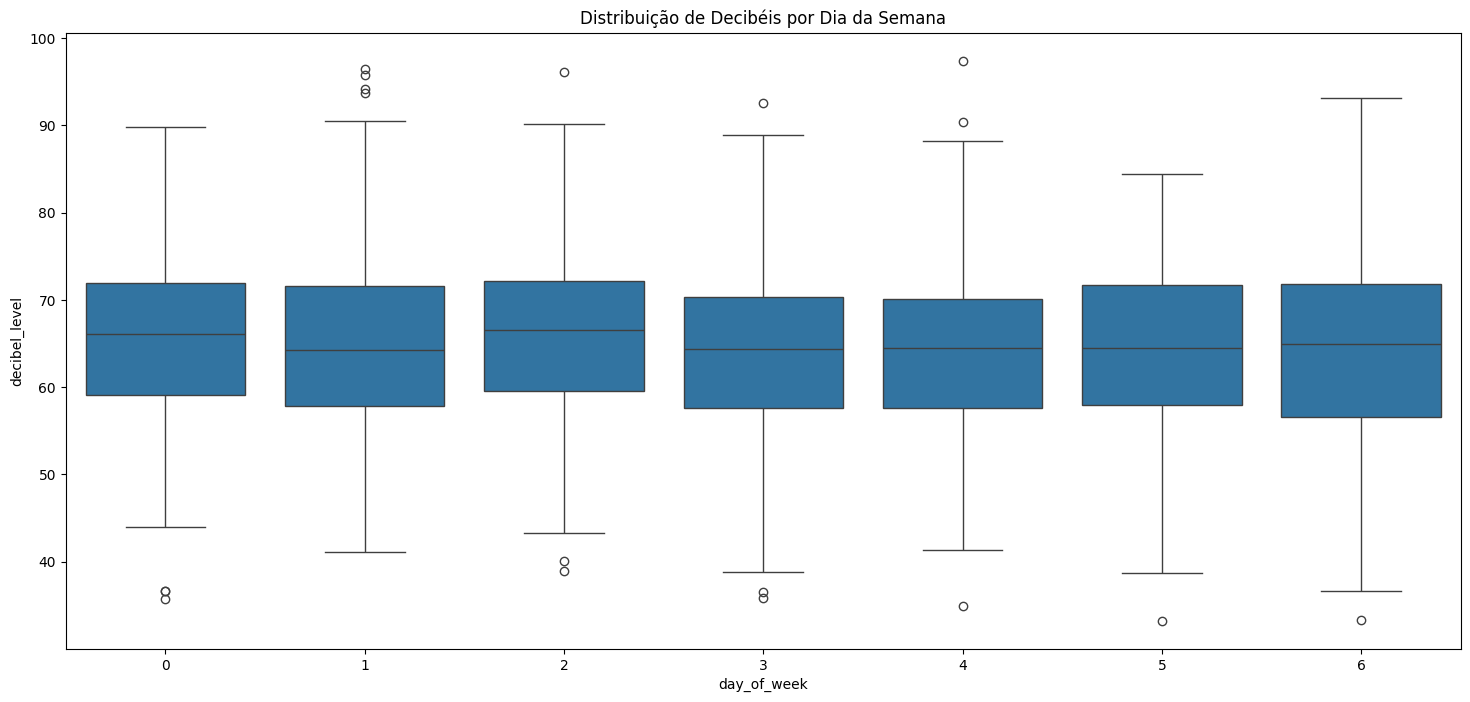

In [ ]:
# Boxplot para 'day_of_week'
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='day_of_week', y='decibel_level')
plt.title('Distribuição de Decibéis por Dia da Semana')
plt.show()

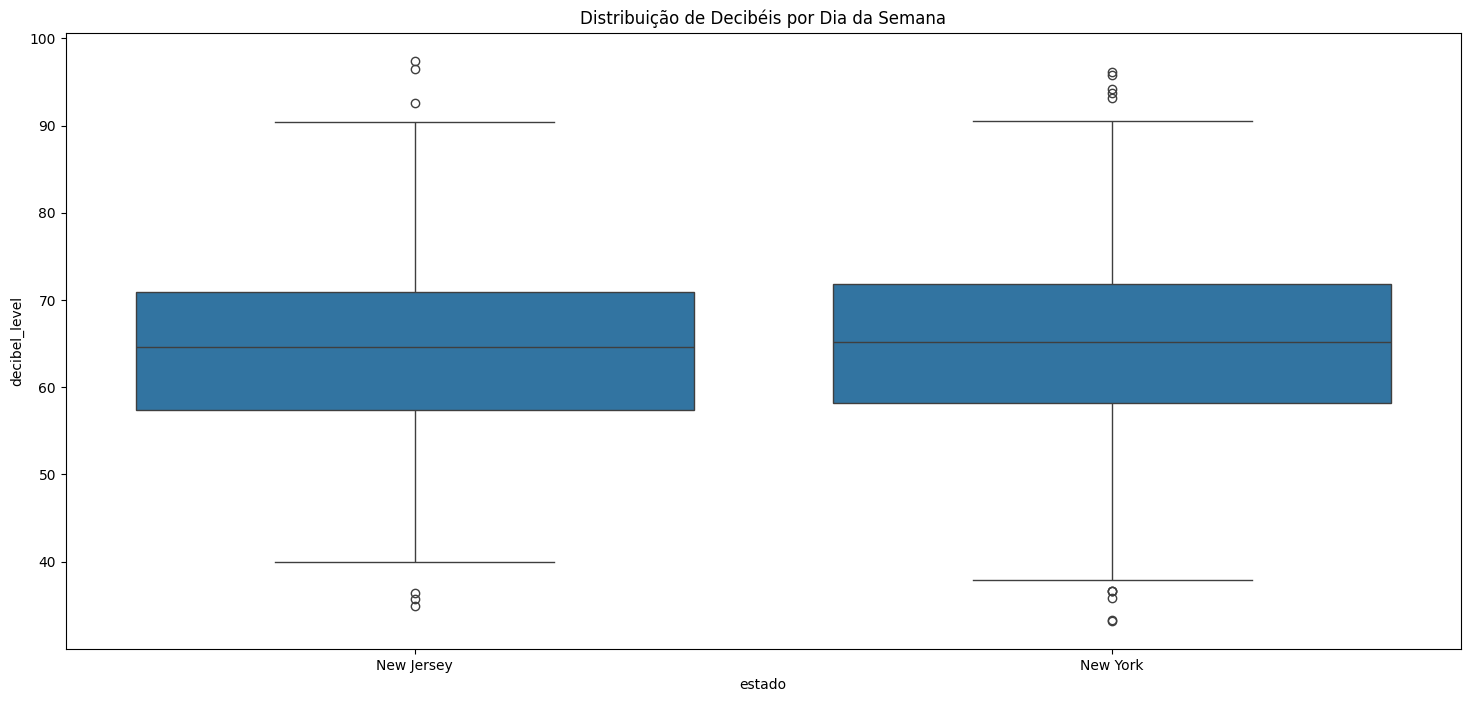

In [ ]:
# Boxplot para 'day_of_week'
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='estado', y='decibel_level')
plt.title('Distribuição de Decibéis por Dia da Semana')
plt.show()

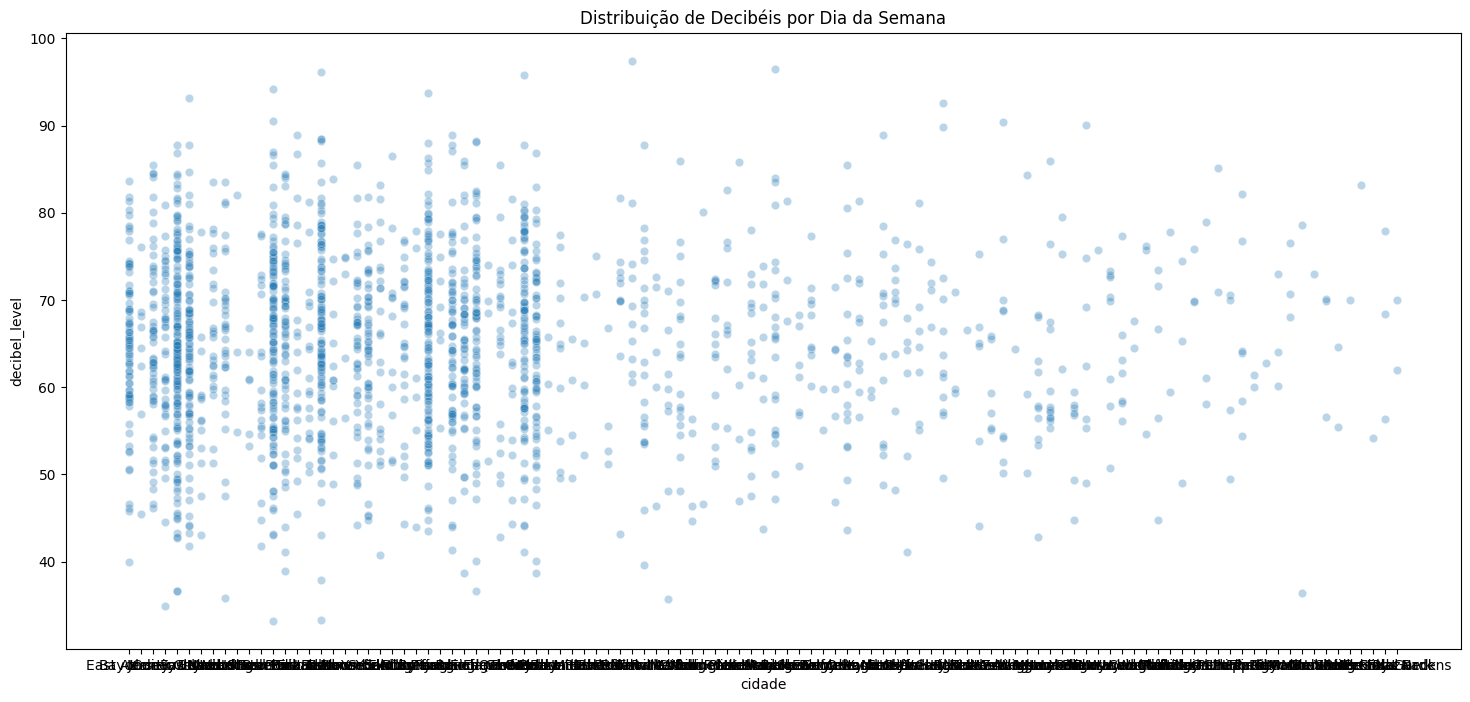

In [ ]:
# Boxplot para 'day_of_week'
plt.figure(figsize=(18, 8))
sns.scatterplot(data=df, x='cidade', y='decibel_level', alpha=0.3)
plt.title('Distribuição de Decibéis por Dia da Semana')
plt.show()

# Just another attempt at exploring this dataset. I'm searching for a variable to explain the decibel_level.

In [ ]:
N = 15

media_por_cidade = df.groupby('cidade')['decibel_level'].mean()

top_N_cidades_lista = media_por_cidade.nlargest(N).index

df_filtrado = df[df['cidade'].isin(top_N_cidades_lista)]

df_filtrado['cidade'] = pd.Categorical(df_filtrado['cidade'], categories=top_N_cidades_lista, ordered=True)
df_filtrado = df_filtrado.sort_values('cidade')

/tmp/ipykernel_55/3881812686.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['cidade'] = pd.Categorical(df_filtrado['cidade'], categories=top_N_cidades_lista, ordered=True)


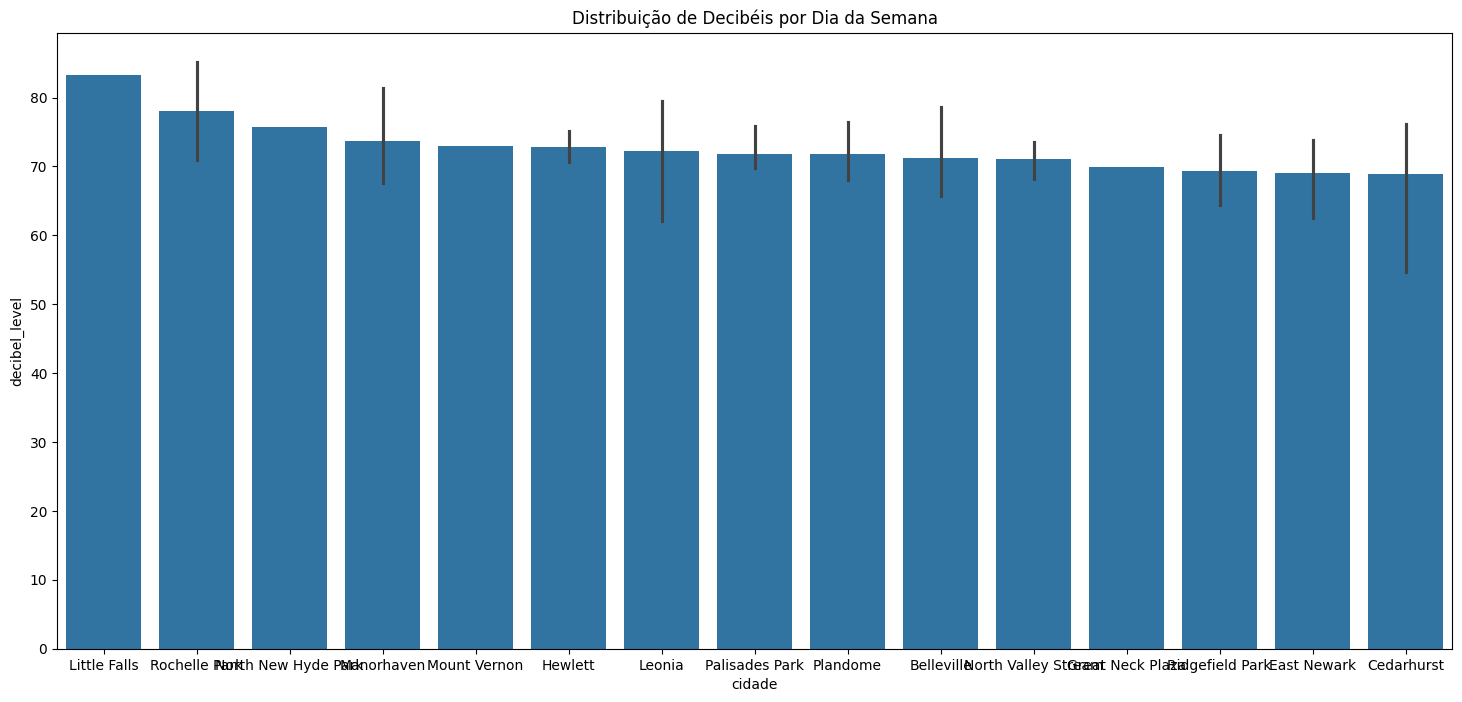

In [ ]:
# Boxplot para 'day_of_week'
plt.figure(figsize=(18, 8))
sns.barplot(data=df_filtrado, x='cidade', y='decibel_level', alpha=1)
plt.title('Distribuição de Decibéis por Dia da Semana')
plt.show()

# At this point, I decided to try clustering, because I can't see a clear explanation yet.

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

In [ ]:
cols_to_drop  =['latitude','longitude','day_of_week','is_weekend','sensor_id','id']

In [ ]:
numeric_cols= numeric_cols.drop(cols_to_drop)

In [ ]:
df_numeric = df[numeric_cols].copy()

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   decibel_level       2000 non-null   float64
 1   hour                2000 non-null   int64  
 2   temperature_c       2000 non-null   float64
 3   humidity_%          2000 non-null   float64
 4   wind_speed_kmh      2000 non-null   float64
 5   precipitation_mm    2000 non-null   float64
 6   traffic_density     2000 non-null   int64  
 7   near_airport        2000 non-null   int64  
 8   near_highway        2000 non-null   int64  
 9   near_construction   2000 non-null   int64  
 10  population_density  2000 non-null   int64  
 11  park_proximity      2000 non-null   int64  
 12  industrial_zone     2000 non-null   int64  
 13  vehicle_count       2000 non-null   int64  
 14  honking_events      2000 non-null   int64  
 15  public_event        2000 non-null   int64  
 16  holida

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

In [ ]:
Z = hierarchy.linkage(df_scaled, method='ward')

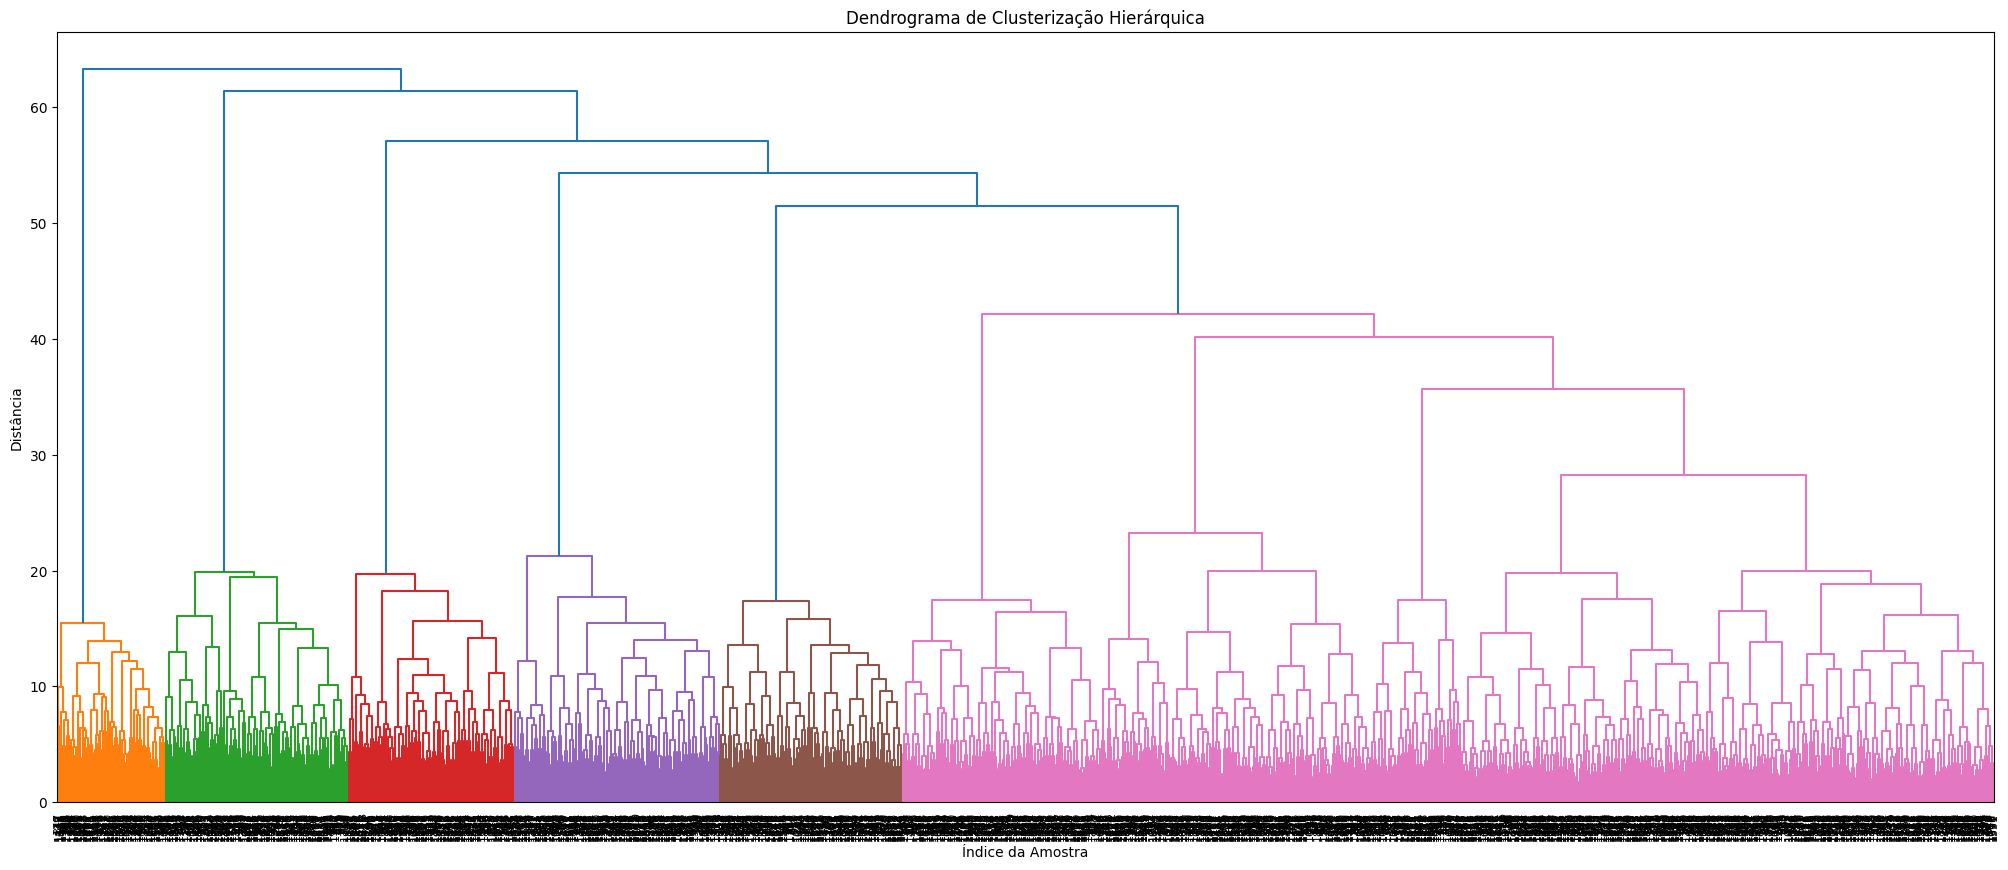

In [ ]:
# Plotar o dendrograma
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de Clusterização Hierárquica')
plt.xlabel('Índice da Amostra')
plt.ylabel('Distância')
hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # Rotaciona os rótulos do eixo x para melhor leitura
    leaf_font_size=8.,  # Define o tamanho da fonte dos rótulos
)
plt.show()

# The dendrogram suggests the existence of distinct clusters within the dataset.

In [ ]:
# Definir o número de clusters desejado (ex: 4)
num_clusters = 5
# Usar fcluster para obter os rótulos dos clusters
# criterion='maxclust' significa que queremos um número máximo de clusters igual a 't'
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Adicionar os rótulos dos clusters ao DataFrame original
df['cluster'] = clusters

print(f"Número de clusters formados: {df['cluster'].nunique()}")
print("Distribuição das amostras por cluster:")
display(df['cluster'].value_counts().sort_index())

Número de clusters formados: 5
Distribuição das amostras por cluster:


cluster
1     112
2     189
3     171
4     212
5    1316
Name: count, dtype: int64

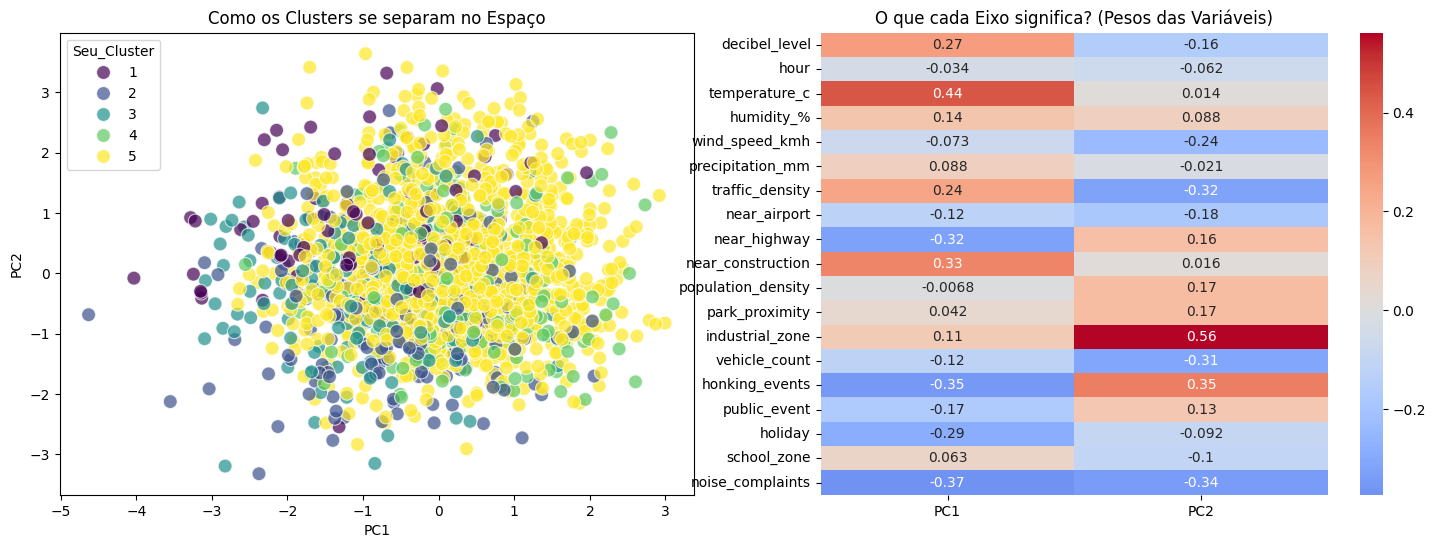

In [ ]:
# 3. APLICAR PCA
pca = PCA(n_components=2) # Vamos reduzir para 2D para conseguir ver
principalComponents = pca.fit_transform(df_scaled)

# Criar um DataFrame temporário com os resultados do PCA
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['Seu_Cluster'] = clusters # Trazendo os labels de volta

# 4. PLOTAR
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico A: Visualização Espacial (As "Bolinhas")
sns.scatterplot(x='PC1', y='PC2', hue='Seu_Cluster', data=pca_df,
                palette='viridis', s=100, alpha=0.7, ax=ax[0])
ax[0].set_title('Como os Clusters se separam no Espaço')

# Gráfico B: Interpretação dos Eixos (O "Segredo")
# Isso mostra quais variáveis originais "puxam" os dados para a direita/esquerda ou cima/baixo
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df_numeric.columns)
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, ax=ax[1])
ax[1].set_title('O que cada Eixo significa? (Pesos das Variáveis)')

plt.show()

In [ ]:
df_scaled['cluster'] = clusters

In [ ]:
cols_to_check = ['near_airport', 'near_construction', 'near_highway', 'park_proximity']

In [ ]:
cols_final = ['holiday', 'school_zone', 'public_event','near_airport']

In [ ]:
cluster_summary = df.groupby('cluster')[cols_final].agg(['mean']).round(2)
display(cluster_summary)

,holiday,school_zone,public_event,near_airport
,mean,mean,mean,mean
cluster,,,,
1,0.07,0.13,1.00,0.04
2,0.11,0.14,0.01,1.00
3,1.00,0.15,0.00,0.01
4,0.00,1.00,0.00,0.01
5,0.01,0.01,0.00,0.00


# THE RESULT


In [ ]:
def classificar_cliente(linha):
    # Imagine uma lógica complexa aqui
    if linha['cluster'] ==1:
        return 'eventos_publicos'
    elif linha['cluster'] ==2:
        return 'perto_de_aeroporto'
    elif linha['cluster'] ==3:
        return 'feriado'
    elif linha['cluster'] ==4:
        return 'zona_escolar'
    else:
        return 'sem classificacao'

# axis=1 significa que você vai ler linha por linha
df['status_cliente'] = df.apply(classificar_cliente, axis=1)

In [ ]:
df.head()

,id,latitude,longitude,datetime,decibel_level,hour,day_of_week,is_weekend,temperature_c,humidity_%,wind_speed_kmh,precipitation_mm,traffic_density,near_airport,near_highway,near_construction,population_density,park_proximity,industrial_zone,vehicle_count,honking_events,public_event,holiday,school_zone,noise_complaints,sensor_id,estado,cidade,cluster,status_cliente
0,1,40.649816,-74.069147,2023-04-01 18:50:00,78.286408,18,5,1,16.710979,43.054747,28.737659,0.515447,4,0,0,0,28384,0,0,24,1,0,0,1,1,31,New Jersey,Bayonne,4,zona_escolar
1,2,40.880286,-74.076511,2023-03-18 04:12:00,68.131845,4,5,1,10.088749,29.676246,15.681181,0.008220,2,0,0,0,24206,0,0,15,2,0,0,0,0,40,New Jersey,Lodi,5,sem classificacao
2,3,40.792798,-73.746873,2023-12-03 05:43:00,58.934966,5,6,1,19.911075,47.932832,36.197181,0.839945,4,0,1,0,1894,1,0,15,2,0,0,0,0,41,New York,East Atlantic Beach,5,sem classificacao
3,4,40.739463,-74.075227,2023-06-20 00:44:00,69.559042,0,1,0,3.477520,88.594010,22.400160,6.938482,4,0,0,0,2265,1,0,24,4,0,0,1,2,50,New Jersey,Jersey City,4,zona_escolar
4,5,40.562407,-74.064025,2023-12-28 12:06:00,60.409097,12,3,0,17.356303,35.811699,18.015603,2.374674,3,0,0,1,23807,1,0,25,2,0,0,0,0,8,New York,Coney Island,5,sem classificacao
